In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet , QuantileRegressor

### 불러오기

In [7]:
cost = pd.read_csv('./Data/global_cost.csv')
cost.head()

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,0.19,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1
1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,0.32,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1
2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,0.27,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1
3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,0.51,...,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1
4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,0.78,...,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1


In [8]:
cost

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,0.19,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1
1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,0.32,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1
2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,0.27,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1
3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,0.51,...,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1
4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,0.78,...,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,Gig Harbor,United States,12.00,40.00,10.50,7.00,6.00,5.21,2.48,1.94,...,101.67,1800.00,2000.00,3000.00,2400.00,3821.19,2852.44,4500.00,5.23,0
2538,Lysa nad Labem,Czech Republic,4.33,32.40,5.19,1.25,2.29,2.15,1.24,0.97,...,73.50,605.62,410.96,854.36,583.99,3028.10,1297.76,634.46,7.00,0
2539,Murovani Kurylivtsi,Ukraine,2.72,12.24,2.69,0.68,1.09,0.68,0.24,0.14,...,61.19,108.79,95.19,163.18,122.38,237.97,231.17,365.79,13.05,0
2540,Tirupati,India,2.46,9.21,4.30,2.21,3.07,1.47,0.46,0.14,...,37.25,82.90,61.41,184.23,128.96,661.00,396.60,614.09,7.97,0


In [24]:
pd.DataFrame(cost['country'].value_counts().sort_values(ascending=False)).head(50)

,country
United States,261
United Kingdom,116
India,115
Italy,95
Mexico,90
Germany,89
Spain,82
Russia,74
Brazil,72
Canada,70


(array([ 9., 27., 78., 33., 40., 54.,  8.,  8.,  2.,  2.]),
 array([ 9.99 , 11.991, 13.992, 15.993, 17.994, 19.995, 21.996, 23.997,
        25.998, 27.999, 30.   ]),
 <BarContainer object of 10 artists>)

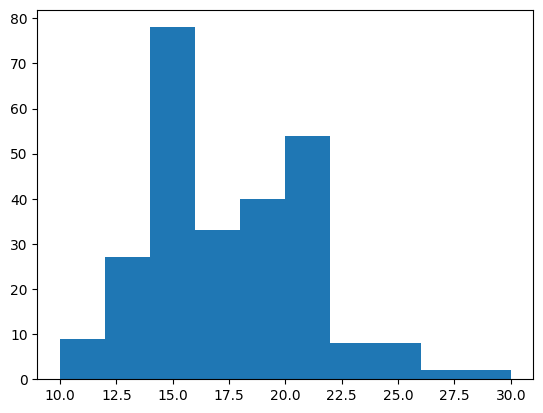

In [29]:
import matplotlib.pyplot as plt

plt.hist(
    cost[cost['country'] == 'United States']['x1'].reset_index(drop=True)
)

In [9]:
columns = ['x2','x3','x4','x5','x6','x7','x8']

target = cost['x1'].to_numpy()
#data = cost[cost.columns.difference(['x1','city','country','data_quality'])].to_numpy()
data = cost[columns].to_numpy()

In [10]:
target.shape

(2542,)

In [11]:
data.shape

(2542, 7)

### train / test 나누기

In [12]:
train_input , test_input , train_target , test_target = \
train_test_split(data,target,test_size=0.2)

### 모델 만들기

In [13]:
knr = KNeighborsRegressor()
lr = LinearRegression()
ridge =Ridge()
lasso = Lasso()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svr = SVR()

In [14]:
# 모델 리스트 만들기
models = [knr, lr, ridge, lasso, dt, rf , svr ]

### 교차검증하기

In [15]:
for model in models:
    scores = cross_validate(
        model,
        train_input,
        train_target,
        return_train_score=True
    )

    print('train : ',np.mean(scores['train_score']))
    print('test : ',np.mean(scores['test_score']))

    print('-'*50)

train :  0.9066518812882164
test :  0.851735395996967
--------------------------------------------------
train :  0.8305439578472349
test :  0.8276365114800303
--------------------------------------------------
train :  0.8305435782644779
test :  0.8276427734795357
--------------------------------------------------
train :  0.7999067407265168
test :  0.7992540347625734
--------------------------------------------------
train :  0.9998176365797958
test :  0.8118760180547244
--------------------------------------------------
train :  0.9864123202764746
test :  0.9090889091435551
--------------------------------------------------
train :  0.8221183954506243
test :  0.8188244307732473
--------------------------------------------------


In [16]:
rf.fit(train_input,train_target)

RandomForestRegressor()

In [17]:
rf.feature_importances_ # 12 , 23 , 36 , 37 , 44 , 50 , 53

array([0.74568847, 0.03848527, 0.02412201, 0.02767878, 0.02480482,
       0.10872967, 0.03049098])

In [18]:
cost['x28'].mean()

1.4128284815106216

In [19]:
cost['x29'].mean()

40.86263571990559